
# Polynomial Regression Assignment

---

In this assignment, you will explore **polynomial regression**, an extension of linear regression models that captures non-linear relationships between variables by adding powers of the original features.

## Objective
By the end of this assignment, you will:
- Understand the concept of polynomial regression and how it differs from linear regression.
- Learn how to implement polynomial regression in Python.
- Compare the performance of linear and polynomial models on a dataset to observe the impact of model complexity.

---


## About Dataset
### Manufacturing Data Report
This report presents an analysis of a manufacturing dataset, which simulates real-world data collected from a manufacturing process. The dataset is designed to explore the relationships between various process parameters and product quality. It contains both feature variables that represent process conditions and a target variable that represents the quality rating of the manufactured items.

**This dataset is clean and does not require any preprocessing steps.**

### Features
Temperature (°C): This column represents the temperature during the manufacturing process, measured in degrees Celsius. Temperature plays a critical role in many manufacturing processes, influencing material properties and product quality.

Pressure (kPa): The pressure applied during the manufacturing process, measured in kilopascals (kPa). Pressure can affect the material transformation and the overall outcome of the manufacturing process.

Temperature x Pressure: This feature is an interaction term between temperature and pressure, which captures the combined effect of these two process parameters.

Material Fusion Metric: A derived metric calculated as the sum of the square of temperature and the cube of pressure. It represents a material fusion-related measurement during the manufacturing process.

Material Transformation Metric: Another derived metric calculated as the cube of temperature minus the square of pressure. It provides insight into material transformation dynamics.

Quality Rating: The target variable, 'Quality Rating,' represents the overall quality rating of the produced items. Quality is a crucial aspect of manufacturing, and this rating serves as a measure of the final product's quality.


## Assignment Instruction Overview

#### 0. Preliminary steps
Set up the environment by importing necessary libraries (such as numpy, pandas, and matplotlib) and ensure the dataset is accessible for loading. This step ensures you have the required tools to work with data and perform polynomial regression.

#### 1. Loading and Visualizing the Data
Load the dataset into a DataFrame and plot it to observe the relationship between features and the target variable. This initial exploration helps determine if the data exhibits a non-linear pattern that may benefit from polynomial regression.

#### 2. Prepare the dataset
Preprocess the data by selecting the feature(s) and target variable, handling any missing values, and potentially scaling the data if needed. Preparing the dataset is key for obtaining meaningful and consistent results from the model.

#### 3. Fitting Polynomial Regression Models
Transform the features into polynomial terms and fit a polynomial regression model to capture non-linear relationships. Begin with a lower degree and increase it as needed to balance model complexity and accuracy.

#### 4. Visual Comparison
Compare the fitted polynomial regression model with a simple linear regression model visually. Plotting both models against the data helps illustrate how polynomial regression captures patterns that linear regression cannot.


---

### 0. Preliminary steps
Install and import any libraries you may need.

In [1]:
# Install core libraries for polynomial regression
!pip install --quiet scikit-learn
!pip install --quiet matplotlib
!pip install --quiet pandas
!pip install --quiet numpy
!pip install --quiet seaborn

%matplotlib inline

In [43]:
# Core library imports for polynomial regression on the manufacturing dataset.

from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

### 1. Loading and visualizing the data
In this step, we will load the dataset, inspect its structure, and create a visualization to understand the relationship between the feature(s) and the target variable.

1. **Load the Dataset**: Use `pandas.read_csv()` or another appropriate method to load the dataset into a DataFrame.

2. **Inspect the Data**: Print out the first few rows of the data using `.head()` to get a sense of its structure and identify any key columns.

3. **Visualize the Data**: Useful libraries for visualization include `matplotlib` and `seaborn`. You can use scatter plots, pair plots, histogram plots, heatmaps, distribution plots, boxplots or other relevant plots to explore the data. 


In [7]:
DATASET_PATH = Path("manufacturing.csv")

manufacturing_df = pd.read_csv(DATASET_PATH)

In [4]:
column_overview = pd.DataFrame(
    {
        "dtype": manufacturing_df.dtypes,
        "missing_values": manufacturing_df.isna().sum(),
    }
)

column_overview

,dtype,missing_values
Temperature (°C),float64,0
Pressure (kPa),float64,0
Temperature x Pressure,float64,0
Material Fusion Metric,float64,0
Material Transformation Metric,float64,0
Quality Rating,float64,0


In [5]:
manufacturing_df.head()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000


In [6]:
manufacturing_df.describe().T


,count,mean,std,min,25%,50%,75%,max
Temperature (°C),3957.0,2.000347e+02,5.813572e+01,100.014490,1.508713e+02,1.986034e+02,2.513666e+02,2.999928e+02
Pressure (kPa),3957.0,1.481556e+01,5.772040e+00,5.003008,9.692984e+00,1.483256e+01,1.974968e+01,2.499913e+01
Temperature x Pressure,3957.0,2.955321e+03,1.458225e+03,513.706875,1.798247e+03,2.678278e+03,3.929058e+03,7.365019e+03
Material Fusion Metric,3957.0,4.812718e+04,2.381221e+04,10156.971955,2.762693e+04,4.461145e+04,6.780544e+04,1.037562e+05
Material Transformation Metric,3957.0,1.003645e+07,7.599356e+06,999946.221844,3.433810e+06,7.833390e+06,1.588251e+07,2.699783e+07
Quality Rating,3957.0,9.626018e+01,1.299226e+01,1.000000,9.994113e+01,1.000000e+02,1.000000e+02,1.000000e+02


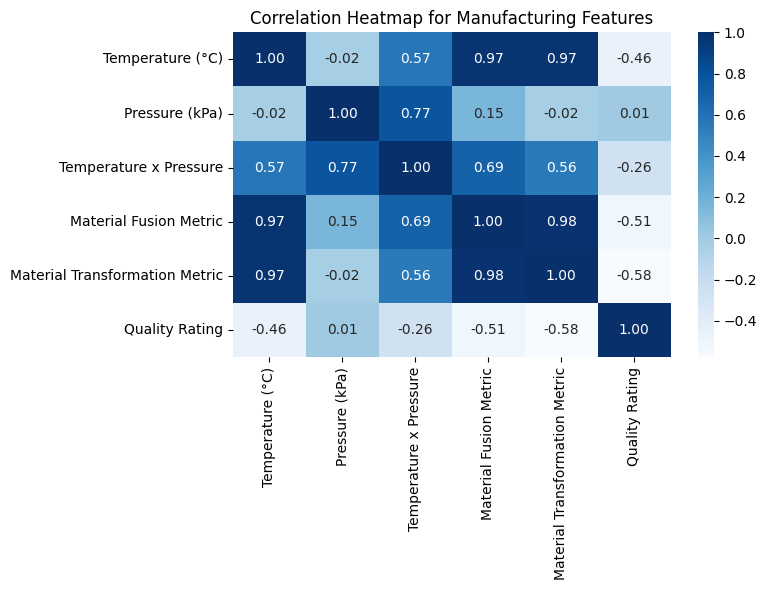

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    manufacturing_df.corr(numeric_only=True),
    annot=True,
    cmap="Blues",
    fmt=".2f",
)
plt.title("Correlation Heatmap for Manufacturing Features")
plt.tight_layout()
plt.show()


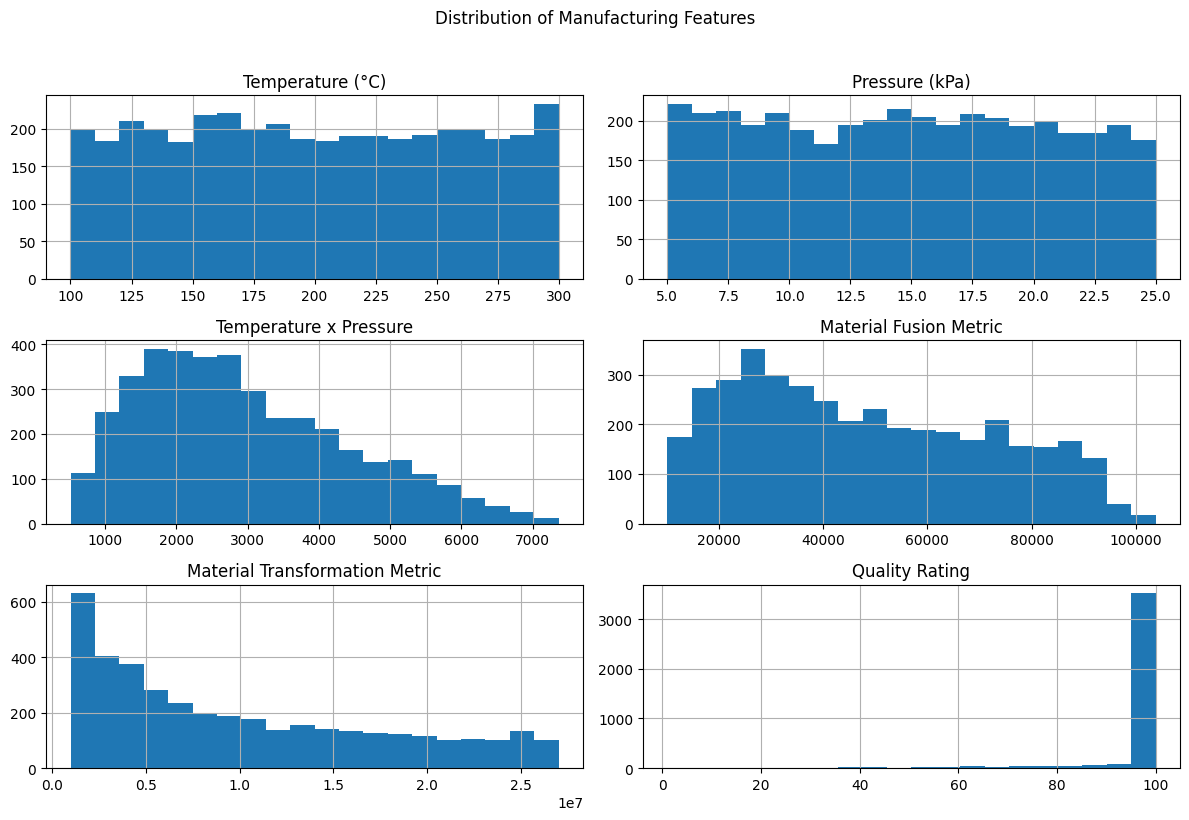

In [9]:
manufacturing_df.hist(figsize=(12, 8), bins=20)
plt.suptitle("Distribution of Manufacturing Features", y=1.02)
plt.tight_layout()
plt.show()


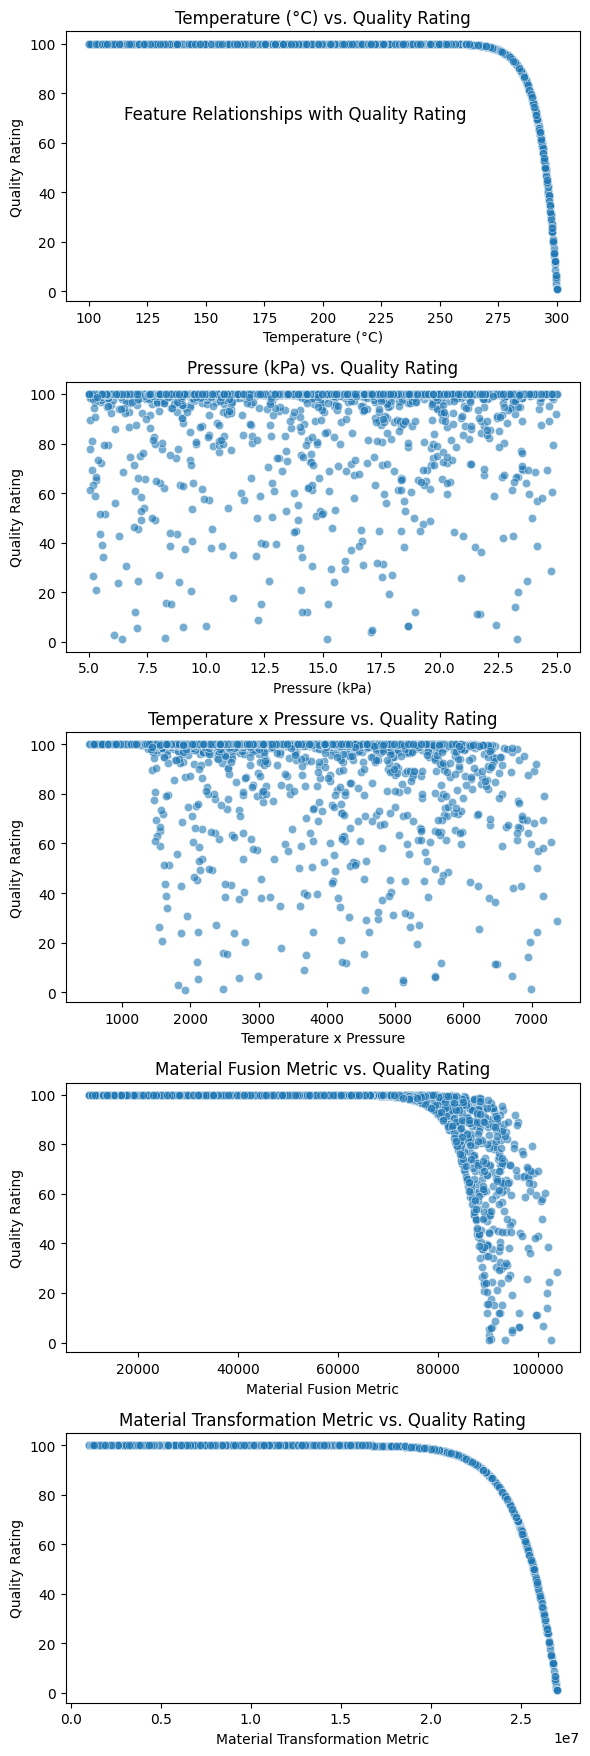

In [10]:
target_column = "Quality Rating"
feature_columns = [
    "Temperature (°C)",
    "Pressure (kPa)",
    "Temperature x Pressure",
    "Material Fusion Metric",
    "Material Transformation Metric",
]

fig, axes = plt.subplots(len(feature_columns), 1, figsize=(6, 18), sharey=True)

for ax, feature in zip(axes, feature_columns):
    sns.scatterplot(
        data=manufacturing_df,
        x=feature,
        y=target_column,
        ax=ax,
        alpha=0.6,
    )
    ax.set_title(f"{feature} vs. {target_column}")

fig.suptitle("Feature Relationships with Quality Rating", y=0.92)
plt.tight_layout()
plt.show()


### 2. Prepare the dataset

1. **Choose a feature**: Choose one column from the dataset to use as an independent feature for the regression model. Explain your choice based on the findings from the previous step.

2. **Split the Data**: Use `train_test_split()` from `sklearn.model_selection` to divide the data into training and testing sets. This allows us to assess the model's ability to generalize to new data.

In the previous step, we explored the relationships between each feature and the `Quality Rating` using correlation and scatter plots.

- The scatter plot showed the most pronounced, curved trend between the `Material Transformation Metric` and `Quality Rating`, suggesting both the strongest correlation and a potentially polynomial relationship.
- Guided by that visual evidence (and confirmed by the correlation table below), we will focus on the `Material Transformation Metric` as our single feature and split it together with the target into **training** and **test** sets so that later models can be evaluated on unseen data.

In [15]:
TARGET_COLUMN = target_column
CANDIDATE_FEATURES = feature_columns
FEATURE_FOR_MODEL = "Material Transformation Metric"
if FEATURE_FOR_MODEL not in CANDIDATE_FEATURES:
    raise ValueError("Configured feature is not available in the candidate list.")

print("\nSelected feature for regression:", FEATURE_FOR_MODEL)


Selected feature for regression: Material Transformation Metric


In [ ]:
# Build the modeling arrays and create train/test splits.

X = manufacturing_df[[FEATURE_FOR_MODEL]]
y = manufacturing_df[[TARGET_COLUMN]]

TEST_SET_SIZE = 0.2
RANDOM_SEED = 42

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=TEST_SET_SIZE,
    random_state=RANDOM_SEED,
)

print("Train shapes:", X_train.shape, y_train.shape)
print("Test shapes:", X_test.shape, y_test.shape)


Train shapes: (3165, 1) (3165, 1)
Test shapes: (792, 1) (792, 1)


### 3. Fitting Polynomial Regression Models

1. **Polynomial features**: Transform your independent feature to include polynomial terms. Use `PolynomialFeatures` from `sklearn.preprocessing` to generate polynomial terms up to the chosen degree. 
2. **Find the best**: Find the best polynomial degree for the independent feature. Test with a low-degree polynomial (e.g., degree 2) and increase the degree to see how the fit changes  (This is best done by a loop. There is usually a sweet spot, where the MSE is optimally low). Evaluate the fit by measuring the Mean Squared Error. Use `mean_squared_error` from `sklearn.metrics`. You can also experiment with other metrics like `r2_score`.

We now apply $K$-fold cross-validation (with $K=5$) on the training split for each polynomial degree. This guards against overfitting by ensuring that every sample serves as a validation point once, and it lets us pick the degree that minimizes the average validation MSE before touching the test data.


In [48]:
# Evaluate polynomial degrees with K-fold cross-validation and keep the best model.

DEGREES_TO_TEST = range(1, 10)
KFOLDS = 5

# LinearRegression in sklearn expects 1D target arrays
y_train_array = y_train.to_numpy().ravel()
y_test_array = y_test.to_numpy().ravel()

evaluation_rows = []
best_degree = None
best_cv_mse = np.inf
best_polynomial_model = None

for degree in DEGREES_TO_TEST:
    polynomial_pipeline = Pipeline(
        [
            ("poly", PolynomialFeatures(degree=degree, include_bias=False)),
            ("regressor", LinearRegression()),
        ]
    )

    cv_results = cross_validate(
        polynomial_pipeline,
        X_train,
        y_train_array,
        scoring={"mse": "neg_mean_squared_error", "r2": "r2"},
        cv=KFOLDS,
    )

    mean_cv_mse = -cv_results["test_mse"].mean()
    std_cv_mse = cv_results["test_mse"].std()
    mean_cv_r2 = cv_results["test_r2"].mean()

    evaluation_rows.append(
        {
            "degree": degree,
            "mean_cv_mse": mean_cv_mse,
            "std_cv_mse": std_cv_mse,
            "mean_cv_r2": mean_cv_r2,
        }
    )

    if mean_cv_mse < best_cv_mse:
        best_degree = degree
        best_cv_mse = mean_cv_mse
        best_polynomial_model = polynomial_pipeline

best_polynomial_model.fit(X_train, y_train_array)
best_test_predictions = best_polynomial_model.predict(X_test)
best_test_mse = mean_squared_error(y_test_array, best_test_predictions)
best_test_r2 = r2_score(y_test_array, best_test_predictions)

polynomial_eval_df = pd.DataFrame(evaluation_rows).set_index("degree")
polynomial_eval_df


,mean_cv_mse,std_cv_mse,mean_cv_r2
degree,,,
1,107.322887,9.044797,0.328138
2,54.164671,4.664525,0.660687
3,31.700194,2.667360,0.801258
4,18.039625,1.336187,0.886814
5,10.008724,0.670894,0.937174
6,5.350695,0.360963,0.966410
7,2.717776,0.196170,0.982942
8,1.288840,0.101241,0.991913
9,0.556484,0.047432,0.996509


In [49]:
print(
    f"Best degree via {KFOLDS}-fold CV: {best_degree}\n"
    f"Mean CV MSE: {best_cv_mse:.4f}\n"
    f"Hold-out test MSE: {best_test_mse:.4f}\n"
    f"Hold-out test R^2: {best_test_r2:.4f}"
)


Best degree via 5-fold CV: 9
Mean CV MSE: 0.5565
Hold-out test MSE: 0.6266
Hold-out test R^2: 0.9969


### 4. Comparison
1. **Fit Linear Regression Model**: First, fit a simple linear regression model on the same data as a baseline.

2. **Overlay Polynomial and Linear Predictions**: On a scatter plot of the data, plot the predictions from both the polynomial and linear models to compare.

3. **Observe Differences**: The polynomial model should capture non-linear patterns in the data that the linear model cannot, especially as the polynomial degree increases.


In [50]:
# Fit a simple linear regression model as a baseline.

baseline_regressor = LinearRegression()
baseline_regressor.fit(X_train, y_train_array)

baseline_test_predictions = baseline_regressor.predict(X_test)
baseline_test_mse = mean_squared_error(y_test_array, baseline_test_predictions)
baseline_test_r2 = r2_score(y_test_array, baseline_test_predictions)

print(f"Baseline linear regression test MSE: {baseline_test_mse:.4f}")
print(f"Baseline linear regression test R^2: {baseline_test_r2:.4f}")

Baseline linear regression test MSE: 135.7570
Baseline linear regression test R^2: 0.3350


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


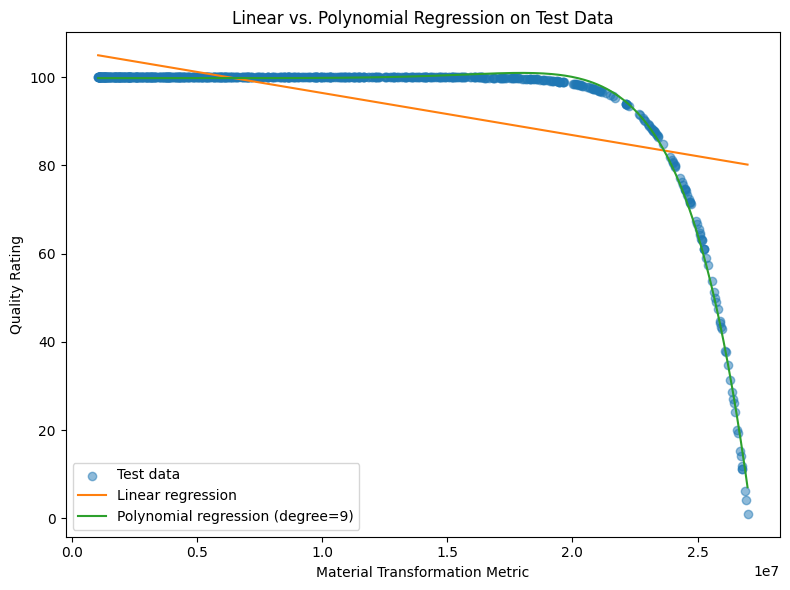

In [51]:
# Visual comparison of baseline linear vs. best polynomial model on the test set.

POINTS_IN_GRID = 300

feature_min = X_test[FEATURE_FOR_MODEL].min()
feature_max = X_test[FEATURE_FOR_MODEL].max()

feature_grid = np.linspace(feature_min, feature_max, POINTS_IN_GRID).reshape(-1, 1)

linear_grid_predictions = baseline_regressor.predict(feature_grid)
polynomial_grid_predictions = best_polynomial_model.predict(feature_grid)

plt.figure(figsize=(8, 6))
plt.scatter(
    X_test[FEATURE_FOR_MODEL],
    y_test_array,
    label="Test data",
    alpha=0.5,
)
plt.plot(
    feature_grid,
    linear_grid_predictions,
    label="Linear regression",
    color="tab:orange",
)
plt.plot(
    feature_grid,
    polynomial_grid_predictions,
    label=f"Polynomial regression (degree={best_degree})",
    color="tab:green",
)

plt.xlabel(FEATURE_FOR_MODEL)
plt.ylabel(TARGET_COLUMN)
plt.title("Linear vs. Polynomial Regression on Test Data")
plt.legend()
plt.tight_layout()
plt.show()
